# Partition Problem

Given a finite set $A$, and a size $s(a)\in\mathbb{Z}^+$ for each $a\in A$, is there a subset $A^{'}\subseteq A$, such that $\Sigma_{a\in A}s(a) = \Sigma_{a\in A-A^{'}}s(a)$.

In [ ]:
!pip install matplotlib

In [1]:
import time
import random
import peqnp
import matplotlib.pyplot as plt

The $size$ and $bits$ for the sample set.

In [2]:
bits = 10
size = 100

The data generator and ploter of data

In [3]:
def plot(S, c=None):
    for s in S:
        if c:
            plt.bar(s, s, color=c, alpha=0.7)
        else:
            plt.bar(s, s, color='g', alpha=0.7)
    plt.show()
def gen_data():
    if size % 2 != 0:
        raise Exception('Error: size != 0 mod 2')
    return sorted([random.randint(1, 2 ** bits) for _ in range(size)])

Generate the the sample set.

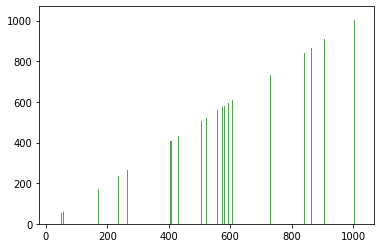

[29, 30, 30, 51, 56, 58, 68, 98, 107, 109, 112, 121, 134, 143, 154, 155, 172, 176, 186, 189, 237, 242, 245, 255, 266, 308, 313, 320, 327, 343, 361, 372, 379, 384, 406, 409, 420, 432, 449, 460, 467, 472, 482, 483, 498, 507, 508, 523, 559, 564, 575, 578, 580, 582, 586, 591, 595, 608, 609, 619, 619, 620, 633, 649, 649, 684, 688, 693, 695, 706, 711, 716, 720, 732, 740, 744, 747, 762, 778, 789, 812, 827, 842, 848, 853, 864, 865, 872, 900, 907, 912, 949, 964, 974, 990, 1001, 1005, 1012, 1019, 1019]


In [4]:
S = gen_data();
plot(S)
print(S)

Solution with **The Core** and **SLIME** SAT Solver.

26301 [143, 172, 176, 186, 242, 266, 308, 313, 320, 361, 372, 379, 384, 432, 449, 460, 472, 482, 498, 507, 508, 559, 578, 580, 582, 608, 609, 619, 620, 633, 684, 693, 706, 716, 720, 740, 747, 842, 848, 864, 949, 964, 974, 1005, 1012, 1019]
26301 [29, 30, 30, 51, 56, 58, 68, 98, 107, 109, 112, 121, 134, 154, 155, 189, 237, 245, 255, 327, 343, 406, 409, 420, 467, 483, 523, 564, 575, 586, 591, 595, 619, 649, 649, 688, 695, 711, 732, 744, 762, 778, 789, 812, 827, 853, 865, 872, 900, 907, 912, 990, 1001, 1019]


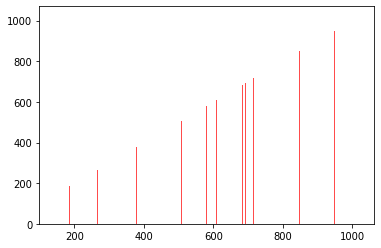

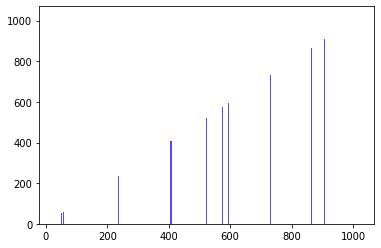

Time 5.386812925338745s


In [5]:
tc = peqnp.TheCore(bits=sum(S).bit_length(), key='partition', folder='db/')

slots = tc.int(size=len(S))

ini = time.time()

assert sum(tc.zero.iff(slots[i], S[i]) for i in range(len(S))) == sum(tc.zero.iff(-slots[i], S[i]) for i in range(len(S)))

if tc.satisfy([slots]):
    A = [S[i] for i in range(len(S)) if slots.binary[i]]
    B = [S[i] for i in range(len(S)) if not slots.binary[i]]
    if sum(A) == sum(B):
        print(sum(A), A)
        print(sum(B), B)
        plot(A, 'r')
        plot(B, 'b')
    else:
        raise Exception
elif tc.unsat:
    print('Infeasible...')
    
end = time.time()
print('Time {}s'.format(end - ini))